In this notebook I'll explore the data called "The Ultimate Netflix TV Shows and Movies (2022 Updated)" by going through the process of preliminary data visualization, defining a goal, developing a model on a training set, testing the model on a validation set, finally fit my finished model to the full data set and prepare presentation visualizations.
This data set is found on Kaggle on 12/7/2022

In [1]:
# Import my packages, 
# numpy for math, pandas for data, 
# matplotlib.pyplot for Matlab like visualizations, seaborn for fancier visualizations 
# sqldf for SQL syntax in Pandas
# sklearn packages for machine learning
import numpy as np 
import pandas as pd 
import itertools
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import pandasql as psql
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
file_paths =[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_paths.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#read the files into pandas dataframes and give them easy to use names
data_set_names = ["bm_net_data", "credits_data", "titles_data", "bm_year_data", "bs_year_data", "bs_net_data"]
for  (name, file) in zip(data_set_names, file_paths):
    # read the file into a dataframe
    df = pd.read_csv(file, index_col= "index")
    # create a new variable with the convient names
    exec(name + "=df")
print(len(bm_year_data))
bm_year_data.head()


49


,TITLE,RELEASE_YEAR,SCORE,MAIN_GENRE,MAIN_PRODUCTION
index,,,,,
0,White Christmas,1954,7.5,romance,US
1,The Guns of Navarone,1961,7.5,war,US
2,My Fair Lady,1964,7.8,drama,US
3,Bonnie and Clyde,1967,7.7,drama,US
4,Dirty Harry,1971,7.7,thriller,US


Data exploration starts with understanding your variables by creating summary statistics and looking at some initial visualizations.

Details of the data: The Best Movie By Year file contains the best movie by year as determined by IMDB score and number of votes

TITLE: The title of the movie or TV show. (String)
RELEASE_YEAR: The year the movie or TV show was released. (Integer)
SCORE: The IMDB score for the movie or TV show. (Float)
MAIN_GENRE: The main genre of the movie or TV show. (String)
MAIN_PRODUCTION: The main production company of the movie or TV show. (String)

In [2]:
#a few descriptive statistics about the Best Movie by Year data
print("Overall the IMDB scores ranged from ", bm_year_data.SCORE.min(), "to ", bm_year_data.SCORE.max(), "over the years ", bm_year_data.RELEASE_YEAR.min(), " and ",bm_year_data.RELEASE_YEAR.max() )
print("The average score was", np.around(bm_year_data.SCORE.mean(), decimals=3), " and the standard deviation was ", np.around(bm_year_data.SCORE.std(), decimals=3))

#Use a query to find the best movies
best_movies=psql.sqldf("""select * 
                       from bm_year_data 
                       where SCORE = (select max(SCORE) from bm_year_data)""")

print("There was", len(best_movies), "with the highest rank.")
print("The highest rated movie was ", best_movies.TITLE[0], "with a IMDB score of ",best_movies.SCORE[0] )
print("It was released in ", best_movies.RELEASE_YEAR[0],"and was of the ", best_movies.MAIN_GENRE[0], "genera.")


Overall the IMDB scores ranged from  5.8 to  9.0 over the years  1954  and  2022
The average score was 7.871  and the standard deviation was  0.633
There was 1 with the highest rank.
The highest rated movie was  David Attenborough: A Life on Our Planet with a IMDB score of  9.0
It was released in  2020 and was of the  documentary genera.


Text(0, 0.5, 'Frequency')

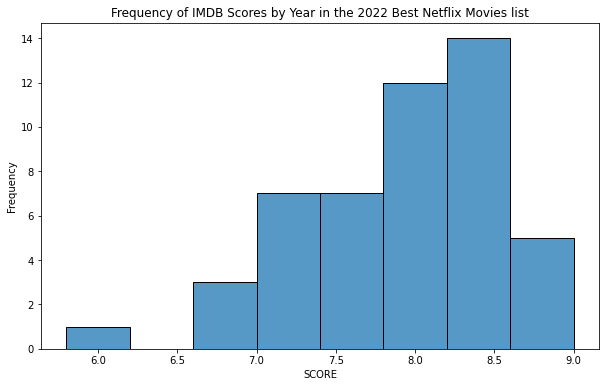

In [3]:
#a few descriptive graphs

#first a bar chart of scores
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Frequency of IMDB Scores by Year in the 2022 Best Netflix Movies list")

# Histogram showing distribution of scores
sns.histplot(data=bm_year_data, x='SCORE')

# Add label for vertical axis
plt.ylabel("Frequency")



Text(0.5, 1.0, 'Genres in the 2022 Best Netflix Movies list')

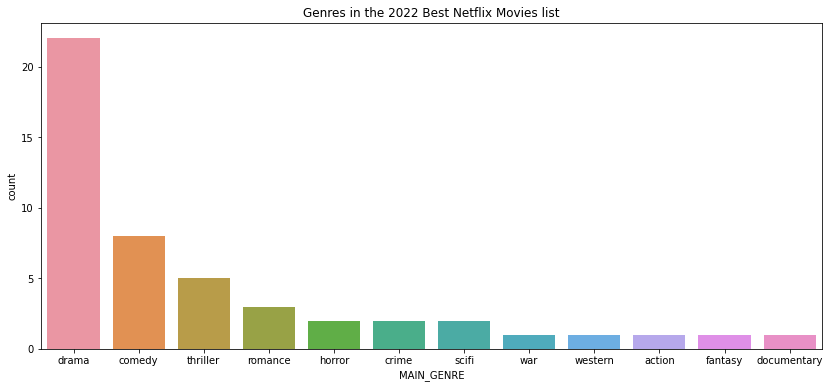

In [4]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

#Bar chart showing distribution of genres
sns.countplot(data=bm_year_data, 
              x='MAIN_GENRE', 
              order =bm_year_data['MAIN_GENRE'].value_counts().index)

# Add title
plt.title("Genres in the 2022 Best Netflix Movies list")



Text(0.5, 1.0, 'Genres in the 2022 Best Netflix Movies list')

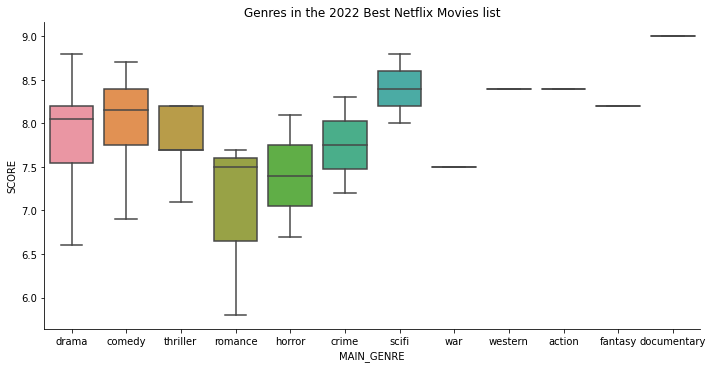

In [5]:
#box plots for genres
# Set the width and height of the figure
#plt.figure(figsize=(14,6))

#Bar chart showing distribution of genres
sns.catplot(data=bm_year_data, 
            x='MAIN_GENRE',
            y='SCORE', 
            order =bm_year_data['MAIN_GENRE'].value_counts().index, 
            kind = 'box', 
            aspect = 2)

# Add title
plt.title("Genres in the 2022 Best Netflix Movies list")


<AxesSubplot:xlabel='RELEASE_YEAR', ylabel='SCORE'>

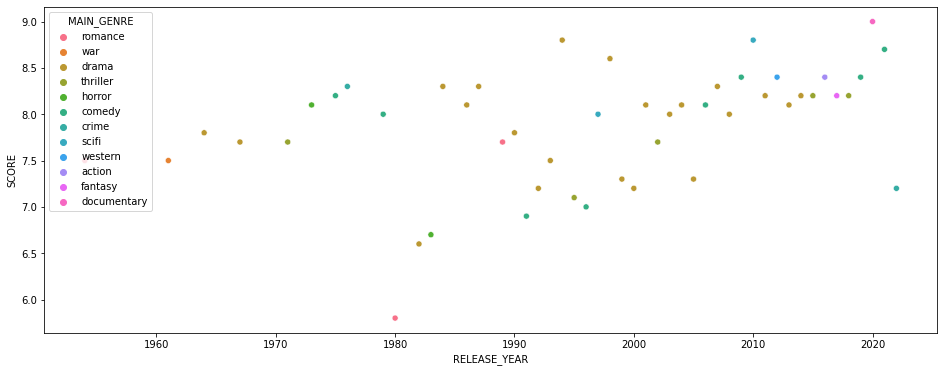

In [6]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))
#Scatter plot of IMDB  Year vs Score
sns.scatterplot(data=bm_year_data, 
                x='RELEASE_YEAR', 
                y='SCORE', 
                hue='MAIN_GENRE')

#bar chart of MAIN_PRODUCTION i.e. location
#box plots of scores based on genre

#scatter plot of scores vs years

Let's continue the process of exploratory descriptive statistics with the other data sets!

In [7]:
#Heat map of Genres and Year with Score as heat

In [8]:
#Best Movie 
#a few descriptive statistics about the Best Movie on Netflix data
print("Overall the IMDB scores ranged from ", bm_net_data.SCORE.min(), "to ", bm_net_data.SCORE.max(), "over the years ", bm_net_data.RELEASE_YEAR.min(), " and ",bm_net_data.RELEASE_YEAR.max() )
print("The average score was", np.around(bm_net_data.SCORE.mean(), decimals=3), " and the standard deviation was ", np.around(bm_net_data.SCORE.std(), decimals=3))

#Use a query to find the best movies
best_movies=psql.sqldf("""select * 
                       from bm_net_data 
                       where SCORE = (select max(SCORE) from bm_net_data)""")

print("There was", len(best_movies), "with the highest rank.")
print("The highest rated movie was ", best_movies.TITLE[0], "with a IMDB score of ",best_movies.SCORE[0] )
print("It was released in ", best_movies.RELEASE_YEAR[0],"and was of the ", best_movies.MAIN_GENRE[0], "genera.")

#Best Show by Year
#Best Show
#credits
#titles

Overall the IMDB scores ranged from  6.9 to  9.0 over the years  1954  and  2022
The average score was 7.509  and the standard deviation was  0.442
There was 1 with the highest rank.
The highest rated movie was  David Attenborough: A Life on Our Planet with a IMDB score of  9.0
It was released in  2020 and was of the  documentary genera.


I suspect that the Best Movies By Year Netflix data set is a subset of the Best Movies Netflix data set. Let's explore that.

In [9]:
#Inner merge the tables to see if bm_year_data is a subset of bm_net_data


same_bm = psql.sqldf('''SELECT y.TITLE,y.RELEASE_YEAR, n.TITLE , n.RELEASE_YEAR      
      FROM bm_year_data y
      INNER JOIN bm_net_data n 
     ON y.TITLE = n.TITLE''' ) 
#Every movie is listed twice, so just keep the distict years
unique_same_bm = psql.sqldf('''SELECT DISTINCT RELEASE_YEAR, TITLE FROM same_bm''')

#From the original data keep just Release Year and Title
year_bm = psql.sqldf('''SELECT  y.RELEASE_YEAR  , y.TITLE     
      FROM bm_year_data y''')

#compare the two sets
print("There are ", len(year_bm), " values in the Best Movies By Year data set.")
print("There are ",len(unique_same_bm), " values in common between the Netflix Best Movies data set and the By Year data set")
#list values that are not in both sets
print("The following movies are the ones not in both sets")
print(pd.concat([unique_same_bm,year_bm]).drop_duplicates(keep=False))

#use the bm_net_data to create a list of best movies for each year from that data, see if it's the same missing movies
net_bm_by_year = psql.sqldf('''SELECT TITLE, RELEASE_YEAR, MAX(SCORE)
            FROM bm_net_data
            GROUP BY RELEASE_YEAR''')
#compare my newly made best movie by year with the original best movie by year set
print("There are ", len(net_bm_by_year), " values that have the highest rank grouped by year in the Netflix Best Movies data set")
print("There are ", len(bm_year_data), " values in the original By Year data set")

#compare the new best by year of list I made with the original best by year
net_bm_y = psql.sqldf('''SELECT  y.RELEASE_YEAR  , y.TITLE     
      FROM net_bm_by_year y''')
print("The following movies are the ones not in both sets")
print(pd.concat([net_bm_y,year_bm]).drop_duplicates(keep=False))

There are  49  values in the Best Movies By Year data set.
There are  47  values in common between the Netflix Best Movies data set and the By Year data set
The following movies are the ones not in both sets
    RELEASE_YEAR            TITLE
9           2016        Christine
9           1980  The Blue Lagoon
10          1982            Annie
11          1983        Christine
There are  49  values that have the highest rank grouped by year in the Netflix Best Movies data set
There are  49  values in the original By Year data set
The following movies are the ones not in both sets
    RELEASE_YEAR                                        TITLE
3           1966                            The Professionals
10          1980                              The Long Riders
11          1982      Monty Python Live at the Hollywood Bowl
21          1995                                       Bombay
28          2002                   The Legend of Bhagat Singh
29          2003                           

Let's check my understanding of the relationship between these data sets. I believe Christine 1983, and The Professionals 1966 is not in the larger Netflix Best Movie Data set, and that best IMDB is insufficient to determine membership to the Best Movie By Year data set for several years. 

In [10]:
#Check my understanding of the set
def Christine_check(data2):
    chris= psql.sqldf('''SELECT * 
                  FROM data2 
                  WHERE TITLE = 'Christine'
                  ''')
    print(chris)
#Christine_check(bm_net_data)


#Christine_check(bm_year_data)
#So Christine 2016 is in the Netflix large data set but the 1983 version is not, the opposite is true for the By Year set
def year_check(year):
    by_year= psql.sqldf(f'''SELECT * 
                  FROM bm_year_data 
                  WHERE RELEASE_YEAR = {year}
                  ''')
    net= psql.sqldf(f'''SELECT * 
                  FROM bm_net_data 
                  WHERE RELEASE_YEAR = {year}
                  ''')
    print("by year has", by_year)
    print("from Netflix has", net)
year_check(2020)
#By year was missing The Professionals 1966,
#the two sets each only had one movie for 1980 and 1982  they are different movies
#The other difference seem to be because I made my best list on score only and didn't include weight for score.


by year has    index                                     TITLE  RELEASE_YEAR  SCORE  \
0     46  David Attenborough: A Life on Our Planet          2020    9.0   

    MAIN_GENRE MAIN_PRODUCTION  
0  documentary              GB  
from Netflix has     index                                     TITLE  RELEASE_YEAR  SCORE  \
0       0  David Attenborough: A Life on Our Planet          2020    9.0   
1      51                        My Octopus Teacher          2020    8.1   
2     128                The Trial of the Chicago 7          2020    7.7   
3     147                        The Social Dilemma          2020    7.6   
4     154                                 Athlete A          2020    7.6   
5     159                                      Ludo          2020    7.6   
6     179                   Ala Vaikunthapurramuloo          2020    7.5   
7     208                            Miss Americana          2020    7.4   
8     244                            Raat Akeli Hai          2020    7

So while the Best Movies Netflix data set and the Best Movies By Year data set have many similar values the Best Movie By Year is not a subset of the the Best Movies Netflix data set. There were a few movies that were listed in the best by year but not in the larger Netflix data set. IMDB score is not the only thing that determined if a movie was the best that year, there is also weight placed on number of scores.

Text(0, 0.5, 'Frequency')

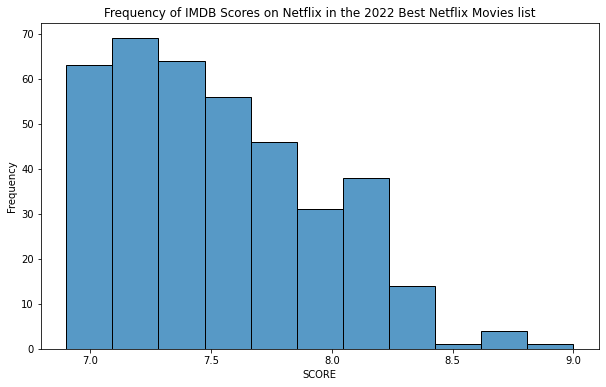

In [11]:
#first a bar chart of scores
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Frequency of IMDB Scores on Netflix in the 2022 Best Netflix Movies list")

# Histogram showing distribution of scores
sns.histplot(data=bm_net_data, x='SCORE')

# Add label for vertical axis
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Genres in the 2022 Best Netflix Movies list')

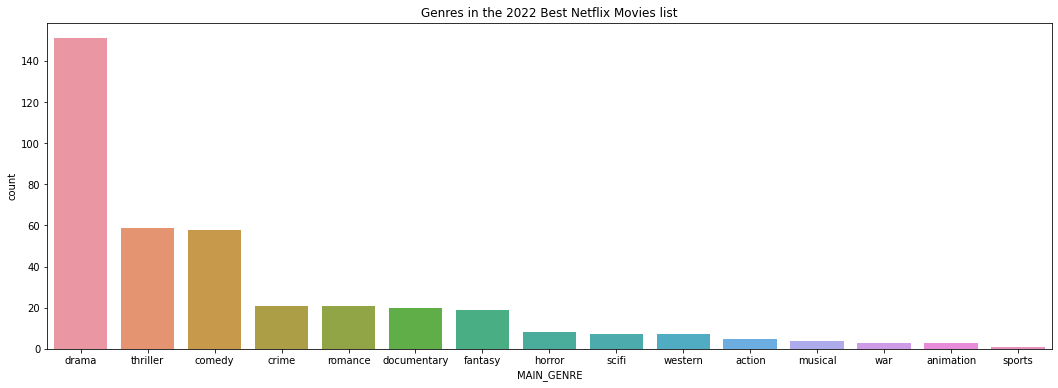

In [12]:
# Set the width and height of the figure
plt.figure(figsize=(18,6))

#Bar chart showing distribution of genres
sns.countplot(data=bm_net_data, 
              x='MAIN_GENRE', 
              order =bm_net_data['MAIN_GENRE'].value_counts().index)

# Add title
plt.title("Genres in the 2022 Best Netflix Movies list")


Text(0.5, 1.0, 'Genres in the 2022 Best Netflix Movies list')

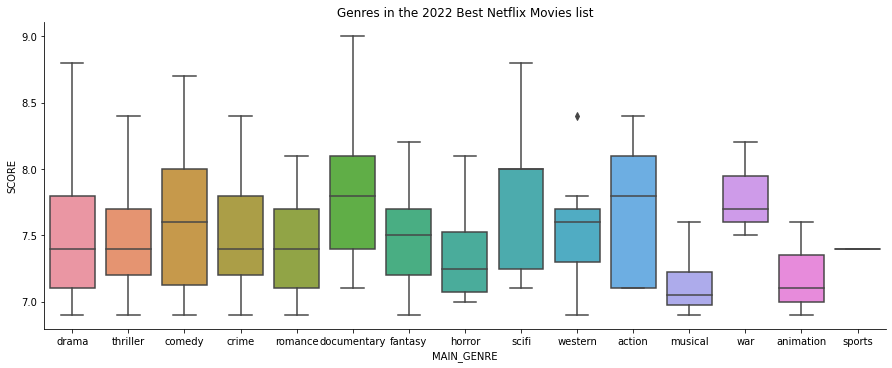

In [13]:
#box plots for genres
# Set the width and height of the figure
#plt.figure(figsize=(14,6))

#Bar chart showing distribution of genres
sns.catplot(data=bm_net_data, 
            x='MAIN_GENRE',
            y='SCORE', 
            order =bm_net_data['MAIN_GENRE'].value_counts().index, 
            kind = 'box', 
            aspect = 2.5)

# Add title
plt.title("Genres in the 2022 Best Netflix Movies list")


<AxesSubplot:xlabel='DURATION', ylabel='SCORE'>

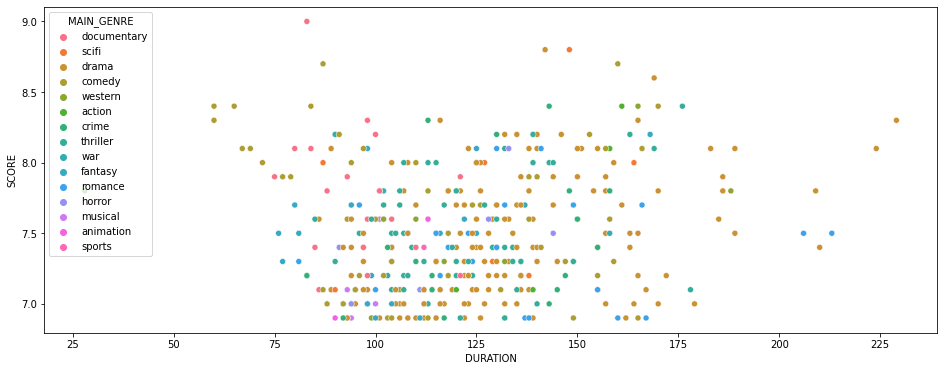

In [14]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))
#Scatter plot of IMDB  Year vs Score

sns.scatterplot(data=bm_net_data, 
                x='DURATION', 
                y='SCORE', 
                hue='MAIN_GENRE')


Now let's use this data to make some buisness decisions and predictions!
Interesting question: What attributes will predict the highest IMDB scores?

I'll develop a model first by starting with all features. Then using the MAE as a validation critera I'll play with the features. Finally I'll do cross validation to see that my model performs well outside the training set.



In [15]:
# Build a model to predict IMDB score
# I'll use the Best Movie Netflix data set rather than By Year based on it having many more data values.
y = bm_net_data.SCORE
# First I'll fit a full model with all features.
# TITLE will be excluded because it is almost always unique. 
# Perhaps in later feature engineering I could search for common words within the title.

# Defining the features
full_features = ['RELEASE_YEAR', 'NUMBER_OF_VOTES', 'DURATION', 'MAIN_GENRE', 'MAIN_PRODUCTION']
X_cat = bm_net_data[full_features]
# One-hot coding categorical variables
X = pd.get_dummies(X_cat)

# Split the data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
train_X.head()

#Fit the model
# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)

#Evaluate the success of the model using MAE
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
print(len(rf_val_predictions)==len(val_y))
print("Validation MAE for Random Forest Model: {:,.6f}".format(rf_val_mae))
# Select the features
#full_features = ['TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_VOTES', 'DURATION', 'MAIN_GENRE', 'MAIN_PRODUCTION']
#X = bm_net_data_[full_features]



True
Validation MAE for Random Forest Model: 0.266010


Let's run cross-validation on the full model

In [16]:
my_pipeline = Pipeline(steps=[
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])
# Multiply by -1 since sklearn calculates *negative* MAE
scores =  -1*cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print(scores.mean())

MAE scores:
 [0.73635897 0.36766667 0.20498701 0.25275325 0.53075325]
0.4185038295038298


In [17]:
#Now I'll fit a simpler model just using the numerical variables
num_features = ['RELEASE_YEAR', 'NUMBER_OF_VOTES', 'DURATION']
X = bm_net_data[num_features]


# Split the data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
train_X.head()

#Fit the model
# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)

#Evaluate the success of the model using MAE
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
print(len(rf_val_predictions)==len(val_y))
print("Validation MAE for Random Forest Model: {:,.4f}".format(rf_val_mae))

True
Validation MAE for Random Forest Model: 0.3015


In [18]:
#Fitting a categorical only model
# Defining the features
cat_features = [ 'MAIN_GENRE', 'MAIN_PRODUCTION']
X_cat = bm_net_data[cat_features]
# One-hot coding categorical variables
X = pd.get_dummies(X_cat)

# Split the data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
train_X.head()

#Fit the model
# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)

#Evaluate the success of the model using MAE
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
print(len(rf_val_predictions)==len(val_y))
print("Validation MAE for Random Forest Model: {:,.4f}".format(rf_val_mae))

True
Validation MAE for Random Forest Model: 0.3582


In [19]:
#Fitting less than full but using intuition
intu_features = [ 'NUMBER_OF_VOTES', 'DURATION', 'MAIN_GENRE', 'MAIN_PRODUCTION']
X_intu = bm_net_data[intu_features]
# One-hot coding categorical variables
X = pd.get_dummies(X_intu)

# Split the data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
train_X.head()

#Fit the model
# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)

#Evaluate the success of the model using MAE
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
print(len(rf_val_predictions)==len(val_y))
print("Validation MAE for Random Forest Model: {:,.6f}".format(rf_val_mae))

True
Validation MAE for Random Forest Model: 0.275361


Interesting YEAR seems to have the smallest impact on MAE. I suspect some overfitting due to this being a smallish data set. Let's run cross validation on the model excluding year to see how it holds up with different training data.

In [20]:
my_pipeline = Pipeline(steps=[
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])
# Multiply by -1 since sklearn calculates *negative* MAE
scores =  -1*cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print(scores.mean())

MAE scores:
 [0.72417949 0.35794872 0.19394805 0.26080519 0.54379221]
0.4161347319347322


Being a statistician at heart I would rather not use intuition when I can apply theory. Here I will use RFEC to aid in feature selection.

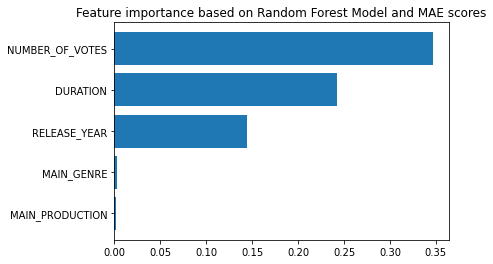

In [21]:


# Reset my X to be the full list of possible features
full_features = ['RELEASE_YEAR', 'NUMBER_OF_VOTES', 'DURATION', 'MAIN_GENRE', 'MAIN_PRODUCTION']
X_cat = bm_net_data[full_features]
# One-hot coding categorical variables
X = pd.get_dummies(X_cat)

# Split the data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
train_X.head()

# Fit the model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
# Plot feature importance
f_i = list(zip(full_features,rf_model.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.title("Feature importance based on Random Forest Model and MAE scores")
plt.show()

This suggests that the categorical variables MAIN_GENRE and MAIN_PRODUCTION are of least importance, so I'll revisit the numerical only random forest model and run cross validation on it.

In [22]:
#Now I'll fit a simpler model just using the numerical variables
num_features = ['RELEASE_YEAR', 'NUMBER_OF_VOTES', 'DURATION']
X = bm_net_data[num_features]


# Split the data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
train_X.head()

#Fit the model
# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
# Cross validation
scores =  -1*cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print(scores.mean())

MAE scores:
 [0.77015385 0.37279487 0.18787013 0.29036364 0.56415584]
0.43706766566766564


It's curious that the model suggest by the feature importance method under performs the model that only excludes year. I suspect it has to do with the handeling of categorical variables. With one-hot encoding each categorical variable is represented by many dummy variables, which adds complexity to the model at a coding level but is still rather simple at human understanding level. 

We do see that of the numerical variables RELEASE_YEAR was the least important, so this supports my intuition. 

At the end of the day I recommend using the model that only excludes RELEASE_YEAR

Future work: Do IMDB scores relate to bigger profits for studios. For that I would need profits for many of these shows and movies. Ideally IMDB scores and profits for movies beyond the top watched for Netflix 2022